In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce


In [2]:
# read all the worksheets form the data excel file
df = pd.read_excel('/Users/labinothaziri/neuefische/da-EDA_project_team3/data/Muesli Project raw data.xlsx', header=1)
df1 = pd.read_excel('/Users/labinothaziri/neuefische/da-EDA_project_team3/data/Muesli Project raw data.xlsx',sheet_name=1)
df2 = pd.read_excel('/Users/labinothaziri/neuefische/da-EDA_project_team3/data/Muesli Project raw data.xlsx',sheet_name=2)
df3 = pd.read_excel('/Users/labinothaziri/neuefische/da-EDA_project_team3/data/Muesli Project raw data.xlsx',sheet_name=3)

In [3]:
# check the df headers
print(df.columns)
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['Index', 'Order ID', 'Order Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Origin Channel', 'Country/Region', 'City', 'State',
       'Postal Code', 'Region', 'Category', 'Sub-Category', 'Product ID',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')
Index(['Order ID', 'Arrival Scan Date', 'Customer Name'], dtype='object')
Index(['Row ID', 'Order ID', 'Order Date', 'On Truck Scan Date', 'Ship Mode'], dtype='object')
Index(['Order ID', 'Ready to Ship Date', 'Pickup Date'], dtype='object')


In [4]:
# delete unneeded columns
df = df.drop(['Index','Origin Channel', 'Category', 'Sub-Category'], axis=1)
df1 = df1.drop(['Customer Name'], axis=1)
df2 = df2.drop(['Row ID', 'Order Date'], axis=1)

In [5]:
# check the number of rows and columns
print('df=',df.shape)
print('df1=',df1.shape)
print('df2=',df2.shape)
print('df3=',df3.shape)

df= (9994, 15)
df1= (333, 2)
df2= (5899, 3)
df3= (290, 3)


In [6]:
# check for duplicates
print('df=',df.duplicated().value_counts())
print('-' * 30)
print('df1=',df1.duplicated().value_counts())
print('-' * 30)
print('df2=',df2.duplicated().value_counts())
print('-' * 30)
print('df3=',df3.duplicated().value_counts())

df= False    9993
True        1
Name: count, dtype: int64
------------------------------
df1= False    333
Name: count, dtype: int64
------------------------------
df2= False    3003
True     2896
Name: count, dtype: int64
------------------------------
df3= False    204
True      86
Name: count, dtype: int64


In [7]:
# drop the duplicates
df_no_dups = df.drop_duplicates()
df2_no_dups = df2.drop_duplicates()
df3_no_dups = df3.drop_duplicates()

In [8]:
# check the number of rows and columns
print('df_no_dups=', df_no_dups.shape)
print('df1=', df1.shape)
print('df2_no_dups=', df2_no_dups.shape)
print('df3_no_dups=', df3_no_dups.shape)

df_no_dups= (9993, 15)
df1= (333, 2)
df2_no_dups= (3003, 3)
df3_no_dups= (204, 3)


In [9]:
# check the df headers and decide what to merge with what
print(df_no_dups.columns)
print(df1.columns)
print(df2_no_dups.columns)
print(df3_no_dups.columns)

Index(['Order ID', 'Order Date', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Country/Region', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')
Index(['Order ID', 'Arrival Scan Date'], dtype='object')
Index(['Order ID', 'On Truck Scan Date', 'Ship Mode'], dtype='object')
Index(['Order ID', 'Ready to Ship Date', 'Pickup Date'], dtype='object')


We have to calculate and validate the company assumptions:
1. Preparation process duration from order reception to shipping (2 days): 'Order Date' - 'Ready to Ship Day' (merge df and df3)
2. Duration of process from "Ready to Ship" to "on Truck" (1 day for normal, 0 days for express): merge df2 and df3
3. Efficacy of "Express Processing": the order ought to be on the truck on the ready to ship day
4. From "On Truck Scan" to "Arrival Scan Date"

...and get image of the whole delivery process duration: from 'Order Date' to 'Arrival Scan Date' (merge df and df2)



1. preparation process duration verification

In [10]:
# merge df and df3

df_prep_dur_ver = pd.merge(df_no_dups, df3_no_dups, on='Order ID', how='inner')

In [11]:
# verify the headers of the merged dataframe

df_prep_dur_ver.columns

Index(['Order ID', 'Order Date', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Country/Region', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Ready to Ship Date', 'Pickup Date'],
      dtype='object')

In [12]:
# delete unneeded columns

df_prep_dur_ver = df_prep_dur_ver.drop(['Ship Mode', 'Country/Region', 'City', 'State', 
                                        'Postal Code', 'Region', 'Product ID', 
                                        'Sales', 'Quantity', 'Discount', 'Profit'], axis=1)

In [13]:
# verify

df_prep_dur_ver.sample(10)

,Order ID,Order Date,Customer ID,Customer Name,Ready to Ship Date,Pickup Date
370,CA-2019-164350,2019-09-10,CG-12040,Catherine Glotzbach,2019-09-12,2019-09-13
198,CA-2020-130386,2020-11-12,NG-18430,Nathan Gelder,2020-11-18,2020-11-20
408,CA-2020-115448,2020-11-11,MH-18025,Michelle Huthwaite,2020-11-16,2020-11-16
263,CA-2019-117604,2019-09-04,JP-15520,Jeremy Pistek,2019-09-09,2019-09-11
344,CA-2020-154732,2020-11-05,AH-10195,Alan Haines,2020-11-09,2020-11-09
379,CA-2020-117702,2020-11-28,LS-16975,Lindsay Shagiari,2020-11-30,2020-12-02
6,CA-2020-135307,2020-11-26,LS-17245,Lynn Smith,2020-11-27,2020-11-27
261,CA-2020-102925,2020-11-05,CD-12280,Christina DeMoss,2020-11-10,2020-11-12
359,CA-2020-103352,2020-11-27,RP-19390,Resi Pölking,2020-11-30,2020-12-02
146,CA-2020-104864,2020-11-18,JS-15685,Jim Sink,2020-11-23,2020-11-25


In [14]:

# Get the weekday name from the date column
df_prep_dur_ver['Weekday'] = df_prep_dur_ver['Order Date'].dt.day_name()

# Print the DataFrame with the weekday column
df_prep_dur_ver


,Order ID,Order Date,Customer ID,Customer Name,Ready to Ship Date,Pickup Date,Weekday
0,CA-2020-119004,2020-11-23,JM-15250,Janet Martin,2020-11-30,2020-12-02,Monday
1,CA-2020-119004,2020-11-23,JM-15250,Janet Martin,2020-11-30,2020-12-02,Monday
2,CA-2020-119004,2020-11-23,JM-15250,Janet Martin,2020-11-30,2020-12-02,Monday
3,CA-2019-145625,2019-09-11,KC-16540,Kelly Collister,2019-09-17,2019-09-18,Wednesday
4,CA-2019-145625,2019-09-11,KC-16540,Kelly Collister,2019-09-17,2019-09-18,Wednesday
...,...,...,...,...,...,...,...
413,CA-2020-152142,2020-11-14,LW-16990,Lindsay Williams,2020-11-16,2020-11-18,Saturday
414,US-2019-134488,2019-09-24,PK-19075,Pete Kriz,2019-10-01,2019-10-02,Tuesday
415,CA-2020-103499,2020-11-20,ES-14020,Erica Smith,2020-11-24,2020-11-25,Friday
416,US-2020-165456,2020-11-30,TB-21625,Trudy Brown,2020-12-03,2020-12-04,Monday


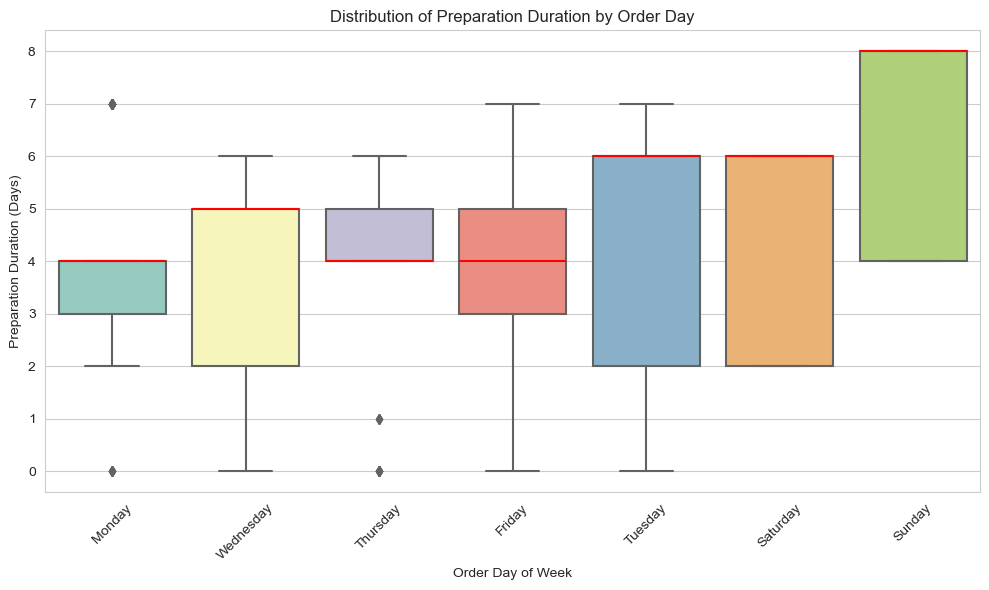

In [15]:
# Convert the date columns to datetime format
df_prep_dur_ver['Order Date'] = pd.to_datetime(df_prep_dur_ver['Order Date'])
df_prep_dur_ver['Ready to Ship Date'] = pd.to_datetime(df_prep_dur_ver['Ready to Ship Date'])
df_prep_dur_ver['Pickup Date'] = pd.to_datetime(df_prep_dur_ver['Pickup Date'])

# Calculate the preparation duration for each order
df_prep_dur_ver['Prep Duration'] = (df_prep_dur_ver['Ready to Ship Date'] - df_prep_dur_ver['Order Date']).dt.days

# Setting up Seaborn style
sns.set_style("whitegrid")

# Plotting the data as boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_prep_dur_ver['Order Date'].dt.day_name(), y='Prep Duration', data=df_prep_dur_ver, palette='Set3',
            medianprops=dict(color='red'))
plt.title('Distribution of Preparation Duration by Order Day')
plt.xlabel('Order Day of Week')
plt.ylabel('Preparation Duration (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [17]:
# check the type of data in the columns

df_prep_dur_ver.dtypes

Order ID                      object
Order Date            datetime64[ns]
Customer ID                   object
Customer Name                 object
Ready to Ship Date    datetime64[ns]
Pickup Date           datetime64[ns]
Weekday                       object
Prep Duration                  int64
dtype: object

In [18]:
# calculate the preparation duration and print it in a new column

df_prep_dur_ver['prep duration'] = df_prep_dur_ver['Ready to Ship Date']-df_prep_dur_ver['Order Date']

In [19]:
# verify

df_prep_dur_ver.sample(10)

,Order ID,Order Date,Customer ID,Customer Name,Ready to Ship Date,Pickup Date,Weekday,Prep Duration,prep duration
25,US-2020-165344,2020-11-13,SB-20290,Sean Braxton,2020-11-16,2020-11-16,Friday,3,3 days
280,CA-2020-105333,2020-11-30,VP-21730,Victor Preis,2020-12-04,2020-12-07,Monday,4,4 days
407,CA-2019-129847,2019-09-02,TA-21385,Tom Ashbrook,2019-09-04,2019-09-04,Monday,2,2 days
225,CA-2019-123932,2019-09-06,YC-21895,Yoseph Carroll,2019-09-12,2019-09-13,Friday,6,6 days
124,CA-2019-149223,2019-09-06,ER-13855,Elpida Rittenbach,2019-09-11,2019-09-13,Friday,5,5 days
372,CA-2020-138163,2020-11-17,XP-21865,Xylona Preis,2020-11-20,2020-11-20,Tuesday,3,3 days
44,CA-2020-152737,2020-11-07,TS-21505,Tony Sayre,2020-11-09,2020-11-12,Saturday,2,2 days
337,CA-2020-121160,2020-11-04,FM-14290,Frank Merwin,2020-11-04,2020-11-04,Wednesday,0,0 days
217,CA-2020-111556,2020-11-20,CD-11920,Carlos Daly,2020-11-23,2020-11-23,Friday,3,3 days
296,CA-2019-126732,2019-09-02,LR-16915,Lena Radford,2019-09-06,2019-09-09,Monday,4,4 days


In [20]:
# check the data type

df_prep_dur_ver['prep duration'].dtype

dtype('<m8[ns]')

what?...

dtype('<m8[ns]') indicates that the data type of the object is a datetime64, representing date and time information with nanosecond precision.

ok, now I get it!

In [21]:
# calculate the mean prep duration
mean_duration_days = df_prep_dur_ver['prep duration'].mean()

# Round the mean duration to the nearest days and hours
rounded_duration = mean_duration_days.round('h')  # Round to the nearest hour

# Convert the rounded duration to days and hours
rounded_days = rounded_duration.days
rounded_hours = rounded_duration.seconds // 3600  # Convert seconds to hours

print(f"{rounded_days} days {rounded_hours} hours")

4 days 4 hours


that's way more than the 2 days claimed preparation duration!

2. Duration of process from "Ready to Ship" to "on Truck" (1 day for normal, 0 days for express): merge df2 and df3


In [22]:
# merge df2 and df3

df_dur_readytoship_truck = pd.merge(df2_no_dups, df3_no_dups, on='Order ID', how='inner')

In [23]:
# verify the merged dataframe

df_dur_readytoship_truck.sample(10)

,Order ID,On Truck Scan Date,Ship Mode,Ready to Ship Date,Pickup Date
4,CA-2019-132143,2019-09-06,Express,2019-09-05,2019-09-06
48,CA-2019-100244,2019-09-25,Standard Processing,2019-09-24,2019-09-25
106,US-2020-136707,2020-11-16,Express,2020-11-16,2020-11-16
158,CA-2020-137022,2020-11-25,Standard Processing,2020-11-23,2020-11-25
100,CA-2020-134915,2020-11-13,Express,2020-11-12,2020-11-13
83,CA-2020-102925,2020-11-12,Standard Processing,2020-11-10,2020-11-12
58,CA-2019-141551,2019-10-02,Standard Processing,2019-09-30,2019-10-02
101,CA-2020-161018,2020-11-13,Standard Processing,2020-11-11,2020-11-13
183,CA-2020-103352,2020-12-02,Standard Processing,2020-11-30,2020-12-02
10,CA-2019-126732,2019-09-09,Standard Processing,2019-09-06,2019-09-09


In [24]:
# calculate the duration of the process from "Ready to Ship" to "on Truck"  and print it in a new column

df_dur_readytoship_truck['ship to truck'] = df_dur_readytoship_truck['On Truck Scan Date']-df_dur_readytoship_truck['Ready to Ship Date']

In [53]:
# verify

df_dur_readytoship_truck.sample(10)

,Order ID,On Truck Scan Date,Ship Mode,Ready to Ship Date,Pickup Date,ship to truck
18,CA-2019-169971,2019-09-11,Standard Processing,2019-09-09,2019-09-11,2 days
151,CA-2020-157448,2020-11-23,Standard Processing,2020-11-20,2020-11-23,3 days
183,CA-2020-103352,2020-12-02,Standard Processing,2020-11-30,2020-12-02,2 days
109,CA-2020-136308,2020-11-16,Express,2020-11-16,2020-11-16,0 days
27,CA-2019-123932,2019-09-13,Standard Processing,2019-09-12,2019-09-13,1 days
43,CA-2019-102932,2019-09-25,Standard Processing,2019-09-23,2019-09-25,2 days
54,CA-2019-134516,2019-09-27,Standard Processing,2019-09-25,2019-09-27,2 days
93,US-2020-122672,2020-11-12,Standard Processing,2020-11-09,2020-11-12,3 days
176,CA-2020-103380,2020-11-30,Standard Processing,2020-11-27,2020-11-30,3 days
75,CA-2020-103009,2020-11-06,Standard Processing,2020-11-05,2020-11-06,1 days


In [55]:
# Get the weekday name from the date column
df_dur_readytoship_truck['Weekday'] = df_dur_readytoship_truck['On Truck Scan Date'].dt.day_name()

# Print the DataFrame with the weekday column
df_dur_readytoship_truck

,Order ID,On Truck Scan Date,Ship Mode,Ready to Ship Date,Pickup Date,ship to truck,Weekday
0,CA-2019-116540,2019-09-03,Express,2019-09-02,2019-09-03,1 days,Tuesday
1,CA-2019-129847,2019-09-04,Express,2019-09-04,2019-09-04,0 days,Wednesday
2,CA-2019-129630,2019-09-04,Express,2019-09-04,2019-09-04,0 days,Wednesday
3,CA-2019-158099,2019-09-06,Express,2019-09-05,2019-09-06,1 days,Friday
4,CA-2019-132143,2019-09-06,Express,2019-09-05,2019-09-06,1 days,Friday
...,...,...,...,...,...,...,...
199,CA-2020-159506,2020-12-04,Standard Processing,2020-12-02,2020-12-04,2 days,Friday
200,US-2020-110576,2020-12-07,Standard Processing,2020-12-04,2020-12-07,3 days,Monday
201,CA-2020-119305,2020-12-07,Standard Processing,2020-12-04,2020-12-07,3 days,Monday
202,CA-2020-105333,2020-12-07,Standard Processing,2020-12-04,2020-12-07,3 days,Monday


/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 45.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 69.9% of the po

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 65.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 78.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 29.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 60.4% of the points cannot be placed; you may want to decrease the size of the markers or use strip

<Figure size 700x400 with 0 Axes>

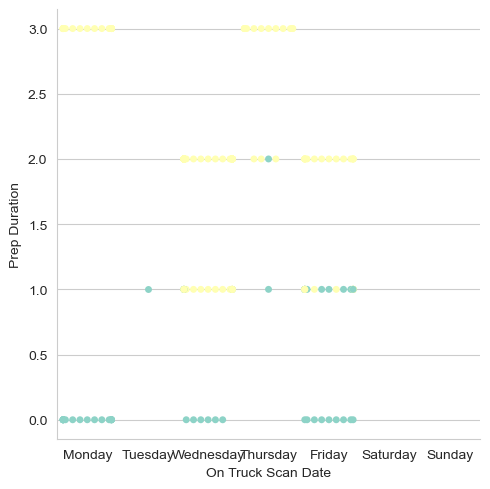

In [68]:
# Convert the date columns to datetime format
df_dur_readytoship_truck['On Truck Scan Date'] = pd.to_datetime(df_dur_readytoship_truck['On Truck Scan Date'])
df_dur_readytoship_truck['Ready to Ship Date'] = pd.to_datetime(df_dur_readytoship_truck['Ready to Ship Date'])
df_dur_readytoship_truck['Pickup Date'] = pd.to_datetime(df_dur_readytoship_truck['Pickup Date'])

# Calculate the preparation duration for each order
df_dur_readytoship_truck['Prep Duration'] = (df_dur_readytoship_truck['On Truck Scan Date'] - df_dur_readytoship_truck['Ready to Ship Date']).dt.days

# Setting up Seaborn style
sns.set_style("whitegrid")
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Plotting the data as boxplots
plt.figure(figsize=(7, 4))
sns.catplot(kind='swarm', x=df_dur_readytoship_truck['On Truck Scan Date'].dt.day_name(), y='Prep Duration', data=df_dur_readytoship_truck,hue='Ship Mode', palette='Set3',
             order=weekday_order)
plt.title('Distribution of Preparation Duration by Order Day')
plt.xlabel('Order Day of Week')
plt.ylabel('Preparation Duration (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
df_dur_readytoship_truck['ship to truck'].unique()

<TimedeltaArray>
['1 days', '0 days', '3 days', '2 days']
Length: 4, dtype: timedelta64[ns]

In [27]:
# check the type of data in the columns

df_dur_readytoship_truck.dtypes

Order ID                       object
On Truck Scan Date     datetime64[ns]
Ship Mode                      object
Ready to Ship Date     datetime64[ns]
Pickup Date            datetime64[ns]
ship to truck         timedelta64[ns]
dtype: object

In [28]:
# filter for the standard processing

df_dur_readytoship_truck_standard = df_dur_readytoship_truck[df_dur_readytoship_truck['Ship Mode']== 'Standard Processing']

In [29]:
# verify

df_dur_readytoship_truck_standard.sample(10)

,Order ID,On Truck Scan Date,Ship Mode,Ready to Ship Date,Pickup Date,ship to truck
136,CA-2020-160416,2020-11-20,Standard Processing,2020-11-18,2020-11-20,2 days
194,CA-2020-155607,2020-12-02,Standard Processing,2020-11-30,2020-12-02,2 days
187,US-2020-128118,2020-12-02,Standard Processing,2020-12-01,2020-12-02,1 days
71,CA-2020-104136,2020-11-06,Standard Processing,2020-11-05,2020-11-06,1 days
180,CA-2020-161459,2020-12-02,Standard Processing,2020-11-30,2020-12-02,2 days
55,CA-2019-123176,2019-10-02,Standard Processing,2019-09-30,2019-10-02,2 days
27,CA-2019-123932,2019-09-13,Standard Processing,2019-09-12,2019-09-13,1 days
53,CA-2019-155187,2019-09-27,Standard Processing,2019-09-26,2019-09-27,1 days
33,CA-2019-146206,2019-09-18,Standard Processing,2019-09-16,2019-09-18,2 days
113,CA-2020-159667,2020-11-16,Standard Processing,2020-11-13,2020-11-16,3 days


In [30]:
# calculate the mean prep duration for the standard processing
mean_to_truck_days_standard = df_dur_readytoship_truck_standard['ship to truck'].mean()

# Round the mean duration to the nearest days and hours
rounded_to_truck_dur_standard = mean_to_truck_days_standard.round('h')  # Round to the nearest hour

# Convert the rounded duration to days and hours
rounded_to_truck_days_standard = rounded_to_truck_dur_standard.days
rounded_to_truck_hours_standard = rounded_to_truck_dur_standard.seconds // 3600  # Convert seconds to hours

print(f"{rounded_to_truck_days_standard} days {rounded_to_truck_hours_standard} hours")

2 days 0 hours


...that's more than the claimed one day

3. Efficacy of "Express Processing": the order ought to be on the truck on the ready to ship day


In [31]:
# filter for the express processing

df_dur_readytoship_truck_xpress = df_dur_readytoship_truck[df_dur_readytoship_truck['Ship Mode']== 'Express']

In [32]:
# verify

df_dur_readytoship_truck_xpress.sample(10)

,Order ID,On Truck Scan Date,Ship Mode,Ready to Ship Date,Pickup Date,ship to truck
99,US-2020-116659,2020-11-13,Express,2020-11-12,2020-11-13,1 days
97,CA-2020-150959,2020-11-13,Express,2020-11-13,2020-11-13,0 days
2,CA-2019-129630,2019-09-04,Express,2019-09-04,2019-09-04,0 days
80,US-2020-155425,2020-11-12,Express,2020-11-11,2020-11-12,1 days
100,CA-2020-134915,2020-11-13,Express,2020-11-12,2020-11-13,1 days
153,CA-2020-162250,2020-11-25,Express,2020-11-24,2020-11-25,1 days
147,CA-2020-121818,2020-11-23,Express,2020-11-23,2020-11-23,0 days
154,CA-2020-137505,2020-11-25,Express,2020-11-24,2020-11-25,1 days
167,CA-2020-100811,2020-11-27,Express,2020-11-26,2020-11-27,1 days
1,CA-2019-129847,2019-09-04,Express,2019-09-04,2019-09-04,0 days


In [33]:
# calculate the mean prep duration for the express processing
mean_to_truck_days_xpress = df_dur_readytoship_truck_xpress['ship to truck'].mean()

# Round the mean duration to the nearest days and hours
rounded_to_truck_dur_xpress = mean_to_truck_days_xpress.round('h')  # Round to the nearest hour

# Convert the rounded duration to days and hours
rounded_to_truck_days_xpress = rounded_to_truck_dur_xpress.days
rounded_to_truck_hours_xpress = rounded_to_truck_dur_xpress.seconds // 3600  # Convert seconds to hours

print(f"{rounded_to_truck_days_xpress} days {rounded_to_truck_hours_xpress} hours")

0 days 10 hours


no comments

4a. From "On Truck Scan" to "Arrival Scan Date"


In [34]:
# merge df1 and df2

df_order_del_time = pd.merge(df2_no_dups, df1, on='Order ID', how='inner')

In [35]:
# verify

df_order_del_time.sample(10)

,Order ID,On Truck Scan Date,Ship Mode,Arrival Scan Date
82,CA-2019-145303,2019-09-03,Express,2019-09-10
280,CA-2020-107503,2020-01-08,Standard Processing,2020-01-13
276,CA-2019-101168,2020-01-03,Standard Processing,2020-01-07
307,CA-2020-155824,2020-03-18,Standard Processing,2020-03-23
332,CA-2020-141733,2020-05-13,Standard Processing,2020-05-15
102,CA-2019-166429,2019-09-11,Standard Processing,2019-09-17
320,CA-2020-162033,2020-04-03,Standard Processing,2020-04-07
230,CA-2019-117583,2019-12-02,Express,2019-12-09
8,CA-2019-162138,2019-05-01,Standard Processing,2019-05-06
315,CA-2020-124716,2020-04-01,Standard Processing,2020-04-06


In [36]:
df_order_del_time['delivery time']=df_order_del_time['Arrival Scan Date']- df_order_del_time['On Truck Scan Date']

In [37]:
# verify
df_order_del_time.sample(10)

,Order ID,On Truck Scan Date,Ship Mode,Arrival Scan Date,delivery time
281,CA-2020-111738,2020-01-08,Standard Processing,2020-01-10,2 days
47,CA-2019-141180,2019-05-22,Standard Processing,2019-05-27,5 days
228,US-2019-127971,2019-11-29,Standard Processing,2019-12-03,4 days
106,CA-2019-154536,2019-09-11,Standard Processing,2019-09-16,5 days
198,CA-2019-140935,2019-11-13,Express,2019-11-15,2 days
140,CA-2019-149979,2019-10-02,Standard Processing,2019-10-07,5 days
290,CA-2020-161893,2020-01-29,Standard Processing,2020-02-03,5 days
8,CA-2019-162138,2019-05-01,Standard Processing,2019-05-06,5 days
255,CA-2019-139885,2019-12-11,Standard Processing,2019-12-16,5 days
289,CA-2020-127432,2020-01-29,Standard Processing,2020-02-03,5 days


In [38]:
# calculate the mean prep duration for the standard processing
mean_order_del_time = df_order_del_time['delivery time'].mean()

# Round the mean duration to the nearest days and hours
rounded_mean_del_time = mean_order_del_time.round('h')  # Round to the nearest hour

# Convert the rounded duration to days and hours
rounded_mean_del_days = rounded_mean_del_time.days
rounded_mean_del_hours = rounded_mean_del_time.seconds // 3600  # Convert seconds to hours

print(f"{rounded_mean_del_days} days {rounded_mean_del_hours} hours")

4 days 14 hours


the shipping company claim is three days, oups!

4b. From "Pickup Date" to "Arrival Scan Date"

In [39]:
# merge df1 and df3

df_order_del_time2 = pd.merge(df1, df3_no_dups, on='Order ID', how='inner')

In [40]:
# verify

df_order_del_time2.sample(10)

,Order ID,Arrival Scan Date,Ready to Ship Date,Pickup Date
10,CA-2019-121223,2019-09-19,2019-09-13,2019-09-16
20,CA-2019-141551,2019-10-07,2019-09-30,2019-10-02
13,CA-2019-145625,2019-09-23,2019-09-17,2019-09-18
21,CA-2019-163202,2019-10-07,2019-10-02,2019-10-04
19,CA-2019-166772,2019-09-30,2019-09-24,2019-09-25
1,CA-2019-129847,2019-09-10,2019-09-04,2019-09-04
15,CA-2019-102932,2019-09-30,2019-09-23,2019-09-25
17,CA-2019-100244,2019-09-30,2019-09-24,2019-09-25
6,CA-2019-102981,2019-09-16,2019-09-09,2019-09-11
12,CA-2019-146206,2019-09-23,2019-09-16,2019-09-18


In [41]:
df_order_del_time2['delivery time2']=df_order_del_time2['Arrival Scan Date']- df_order_del_time2['Pickup Date']

In [42]:
# verify

df_order_del_time2.sample(10)

,Order ID,Arrival Scan Date,Ready to Ship Date,Pickup Date,delivery time2
21,CA-2019-163202,2019-10-07,2019-10-02,2019-10-04,3 days
19,CA-2019-166772,2019-09-30,2019-09-24,2019-09-25,5 days
2,CA-2019-106278,2019-09-10,2019-09-05,2019-09-06,4 days
1,CA-2019-129847,2019-09-10,2019-09-04,2019-09-04,6 days
12,CA-2019-146206,2019-09-23,2019-09-16,2019-09-18,5 days
18,CA-2019-145611,2019-09-30,2019-09-24,2019-09-25,5 days
4,CA-2019-123120,2019-09-16,2019-09-09,2019-09-11,5 days
7,CA-2019-110023,2019-09-16,2019-09-11,2019-09-11,5 days
13,CA-2019-145625,2019-09-23,2019-09-17,2019-09-18,5 days
17,CA-2019-100244,2019-09-30,2019-09-24,2019-09-25,5 days


In [43]:
# calculate the mean prep duration for the standard processing
mean_order_del_time2 = df_order_del_time2['delivery time2'].mean()

# Round the mean duration to the nearest days and hours
rounded_mean_del_time2 = mean_order_del_time2.round('h')  # Round to the nearest hour

# Convert the rounded duration to days and hours
rounded_mean_del2_days = rounded_mean_del_time2.days
rounded_mean_del2_hours = rounded_mean_del_time2.seconds // 3600  # Convert seconds to hours

print(f"{rounded_mean_del2_days} days {rounded_mean_del2_hours} hours")

4 days 16 hours



...and get image of the whole delivery process duration: from 'Order Date' to 'Arrival Scan Date' (merge df and df2)

In [44]:
# merge df and df1

df_order_del_total = pd.merge(df1, df_no_dups, on='Order ID', how='inner')

In [45]:
# verify

df_order_del_total.sample(10)

,Order ID,Arrival Scan Date,Order Date,Ship Mode,Customer ID,Customer Name,Country/Region,City,State,Postal Code,Region,Product ID,Sales,Quantity,Discount,Profit
653,CA-2020-140802,2020-04-27,2020-04-21,First Class,KN-16390,Katherine Nockton,United States,Houston,Texas,77070.0,Central,TEC-AC-10001998,47.976,3,0.2,8.3958
646,CA-2020-135279,2020-04-17,2020-04-09,First Class,BS-11800,Bryan Spruell,United States,New York City,New York,10011.0,East,OFF-PA-10001281,191.600,4,0.0,91.9680
343,CA-2019-147256,2019-10-28,2019-10-17,Second Class,FC-14245,Frank Carlisle,United States,Columbia,Missouri,65203.0,Central,TEC-PH-10003072,449.970,3,0.0,220.4853
186,CA-2019-116526,2019-09-12,2019-09-01,Standard Class,JA-15970,Joseph Airdo,United States,Detroit,Michigan,48227.0,Central,OFF-AP-10002457,376.740,4,0.1,71.1620
309,CA-2019-118689,2019-10-14,2019-10-02,Standard Class,TC-20980,Tamara Chand,United States,Lafayette,Indiana,47905.0,Central,TEC-CO-10004722,17499.950,5,0.0,8399.9760
321,CA-2019-114748,2019-10-21,2019-10-09,Standard Class,MZ-17335,Maria Zettner,United States,Phoenix,Arizona,85023.0,West,FUR-FU-10001488,169.568,2,0.2,0.0000
580,CA-2020-117870,2020-02-06,2020-01-27,Second Class,JH-15820,John Huston,United States,Kent,Ohio,44240.0,East,TEC-PH-10003931,107.982,3,0.4,-26.9955
553,CA-2020-113278,2020-01-27,2020-01-14,Standard Class,HR-14770,Hallie Redmond,United States,Richmond,Indiana,47374.0,Central,TEC-AC-10001445,12.120,4,0.0,2.5452
534,CA-2019-101168,2020-01-07,2019-12-25,Standard Class,SS-20140,Saphhira Shifley,United States,Nashua,New Hampshire,3060.0,East,FUR-FU-10003142,21.120,4,0.0,6.5472
205,CA-2019-137673,2019-09-16,2019-09-05,Standard Class,ML-17395,Marina Lichtenstein,United States,San Diego,California,92105.0,West,TEC-AC-10002345,116.000,8,0.0,29.0000


In [46]:
df_order_del_total = df_order_del_total.drop(['Ship Mode', 'Country/Region', 'City', 'State', 
                                        'Postal Code', 'Region', 'Product ID', 
                                        'Sales', 'Quantity', 'Discount', 'Profit'], axis=1)

In [47]:
# verify

df_order_del_total.sample(10)

,Order ID,Arrival Scan Date,Order Date,Customer ID,Customer Name
373,CA-2019-140935,2019-11-15,2019-11-10,AB-10015,Aaron Bergman
174,CA-2019-145303,2019-09-10,2019-08-28,TP-21415,Tom Prescott
454,US-2019-163881,2019-12-06,2019-11-24,SP-20860,Sung Pak
402,CA-2019-118759,2019-11-21,2019-11-14,MB-17305,Maria Bertelson
635,CA-2020-100524,2020-04-07,2020-03-31,CM-12115,Chad McGuire
576,CA-2020-115994,2020-02-06,2020-01-28,BT-11305,Beth Thompson
140,CA-2019-154081,2019-06-03,2019-05-22,JE-15610,Jim Epp
654,CA-2020-140802,2020-04-27,2020-04-21,KN-16390,Katherine Nockton
76,US-2019-144057,2019-05-20,2019-05-09,CV-12805,Cynthia Voltz
361,CA-2019-112389,2019-11-11,2019-10-29,JM-15655,Jim Mitchum


In [48]:
df_order_del_total['total delivery time']=df_order_del_total['Arrival Scan Date']- df_order_del_total['Order Date']

In [49]:
# verify

df_order_del_total.sample(10)

,Order ID,Arrival Scan Date,Order Date,Customer ID,Customer Name,total delivery time
91,US-2019-117037,2019-05-27,2019-05-17,LW-17215,Luke Weiss,10 days
321,CA-2019-114748,2019-10-21,2019-10-09,MZ-17335,Maria Zettner,12 days
362,CA-2019-112389,2019-11-11,2019-10-29,JM-15655,Jim Mitchum,13 days
421,CA-2019-160129,2019-11-29,2019-11-23,LS-17200,Luke Schmidt,6 days
61,CA-2019-160500,2019-05-14,2019-05-05,DM-13015,Darrin Martin,9 days
367,CA-2019-166443,2019-11-11,2019-11-04,LH-17020,Lisa Hazard,7 days
164,US-2019-146710,2019-09-09,2019-08-27,SS-20875,Sung Shariari,13 days
493,US-2019-155103,2019-12-16,2019-12-02,JF-15190,Jamie Frazer,14 days
66,CA-2019-137729,2019-05-17,2019-05-05,BF-11005,Barry Franz,12 days
157,CA-2019-138695,2019-06-10,2019-05-28,KC-16675,Kimberly Carter,13 days


In [50]:
# calculate the mean prep duration for the standard processing
mean_order_del_total = df_order_del_total['total delivery time'].mean()

# Round the mean duration to the nearest days and hours
rounded_mean_del_total = mean_order_del_total.round('h')  # Round to the nearest hour

# Convert the rounded duration to days and hours
rounded_mean_del_total_days = rounded_mean_del_total.days
rounded_mean_del_total_hours = rounded_mean_del_total.seconds // 3600  # Convert seconds to hours

print(f"{rounded_mean_del_total_days} days {rounded_mean_del_total_hours} hours")

10 days 21 hours


In [51]:
# merge the dataframes with the 'reduce' function
dfs = [df, df1, df2_red_no_dups, df3_no_dups]

merged_df_red = reduce(lambda left, right: pd.merge(left, right, on='Order ID', how='inner'), dfs)

merged_df_red.shape

NameError: name 'df2_red_no_dups' is not defined